<a href="https://colab.research.google.com/github/Jameslorry6666/Micheal.iml/blob/master/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ASSOCIATIVE ALGORITHM

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Connecting libraries

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [ ]:
# connecting a disk

from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [5]:
# the dataset is taken here: https://gist .github.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751#file-retail_dataset-csv
# loading data

df = pd.read_csv('/content/gdrive/MyDrive/Datasets/retail_dataset.csv', sep=',') # my path
df.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [6]:
# unique values

items = set()
for col in df:
    items.update(df[col].dropna().unique())
print(items)


{'Wine', 'Milk', 'Diaper', 'Meat', 'Eggs', 'Bread', 'Bagel', 'Pencil', 'Cheese'}


In [7]:
# data preprocessing
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [8]:
# apriori
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True)
freq_items.head(7)

,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.438095,(Wine)
3,0.406349,(Diaper)
4,0.476190,(Meat)
5,0.438095,(Eggs)
6,0.504762,(Bread)


In [9]:
# Associative rules ("IF, THEN ")
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
3,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
4,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624


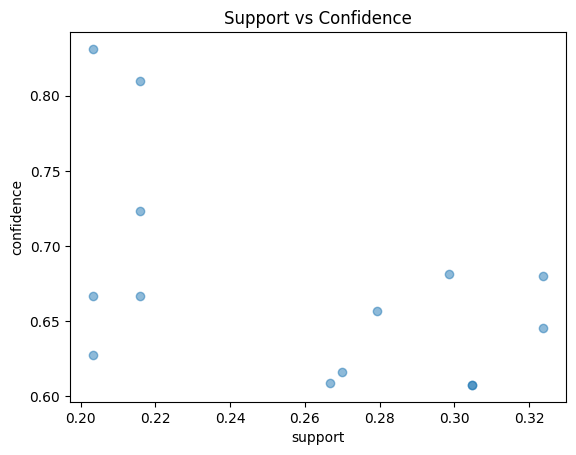

In [10]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

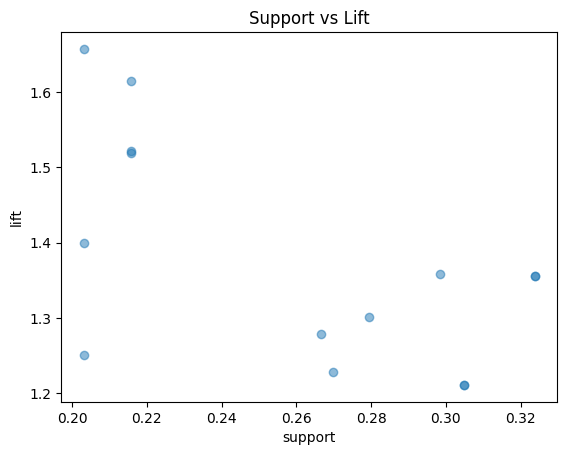

In [11]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

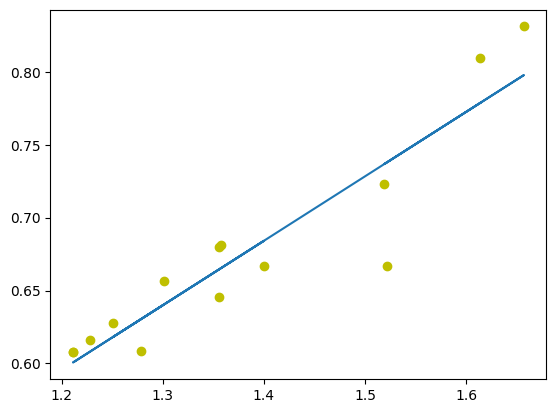

In [12]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))